# Showcase Notebook CcA Codebase
This notebook aims at showing the core functionalities of the code provided in the GitHub repository ```caa-pbl-codebase```.

It is divided into the following parts:
1. Data Access
2. Data Loading
3. Data Curation
4. Preprocessing
5. Modeling
6. Visualization
7. Maintenance

In [12]:
# General imports
from IPython.display import display
import warnings
import matplotlib.pyplot as plt
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

## 0. Setup
In order to run the project's code without problems, please make sure to follow the following setup steps:
1. Download all files of repository and make sure that the main directory is named ```cca-pbl-codebase```
2. Add a file ```credentials.cfg``` to the main directory and set it up with the following structure: 1st line: ```[CcA]```; 2nd line: ```username=your_username```; 3rd line: ```password=your_password``` where your_username is your username for the DSKC database and your_password is your password for the DSKC database. This file will not be added to any VCS since it is added to the ```.gitignore``` file.
3. Make sure you have access to either the Nova SBE Wi-Fi or a safe VPN connection through eduVPN
4. Make sure the project runs on python version 3.9
5. Install all packages with their specified version number listed in the ```requirements.txt``` file
6. Enjoy :)

## 1. Data Access
The scripts relevant for data retrieval are located under ```src/data/access```. These scripts aim at unifying the saving and loading process of data (so that if a saving location changes, this change only needs to apply in the function retrieving the data instead of every function that would retrieve the data separately). For each type of source, the class must be initialized first to connect to the database / load the folder structure.

The data loaded/saved is not only limited to the data provided by CcA. It furthermore includes the handling of preprocessed/intermediate files that are used for models or the access to weather data that is stored under ```external_data/weather_data```.

**In order for the data access functions to work correctly it is important that the user a) saves their database credentials in the ```credentials.cfg``` file in the source directory and b) is either connected to a Nova SBE Wi-Fi or uses eduVPN.**

In [61]:
### Examples

# Initializing database connection
from src.data.access import DbAccessLayer
db_access = DbAccessLayer()

# Loading the articles table provided by CcA
db_access.get_table_as_df('articles')

# Loading and saving precomputed dish ratio matrix
dish_ratio_fresh = db_access.get_dish_sales_ratios(temp_type='Fresh')  # loading
db_access.save_dish_sales_ratios(dish_ratio_fresh, temp_type='Fresh')  # saving

# Loading external weather data
from src.data.access import ExternalDataAccessLayer
external_data = ExternalDataAccessLayer()
external_data.get_weather_data().head(3)

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,cloudcover,uvindex,sunrise,sunset
0,2016-01-01,17.5,11.5,14.0,17.5,11.5,14.0,12.8,92.28,6.13,37.50,63.0,40.1,35.0,0,2016-01-01T07:55:44,2016-01-01T17:26:24
1,2016-01-02,15.7,10.8,12.9,15.7,10.8,12.9,9.3,79.15,0.10,4.17,NaN,11.4,17.5,0,2016-01-02T07:55:53,2016-01-02T17:27:13
2,2016-01-03,16.7,12.4,15.1,16.7,12.4,15.1,14.2,94.14,5.99,66.67,50.4,27.2,40.6,0,2016-01-03T07:55:59,2016-01-03T17:28:02


## 2. Data Loading
Data loading can be best done in three different ways:
1. Using the classes and methods provided under ```src/data/access```
2. Calling ```AllData()``` from ```src/data/loading```. This results in a named tuple with the different relevant tables being loaded.
3. Calling each table separately, e.g. ```Articles()```. This is more complicated since many tables depend on each other, so for loading one, the other must be loaded before. Thus, it is recommended to load all tables in one go as described under 2.

Using 1.:

In [6]:
# Example: load articles and size share matrix
from src.data.access import DbAccessLayer
db_access = DbAccessLayer()
size_shares = db_access.get_size_shares("Fresh")
display(size_shares.head(3))

articles = db_access.get_table_as_df('articles')
display(articles.head(3))

,10P,350GR,5P,6P,8P,G,KG,M,P,PP,UND
adj_article_name,,,,,,,,,,,
Almondegas De Aves,NaN,NaN,NaN,NaN,NaN,0.049587,NaN,0.685950,0.264463,NaN,NaN
Almondegas Em Molho Tomate E Majericao,NaN,NaN,NaN,NaN,NaN,0.295533,NaN,0.494845,0.209622,NaN,NaN
Almondegas Recheadas Com Queijo Feta,NaN,NaN,NaN,NaN,NaN,0.072727,NaN,0.598240,0.321994,NaN,NaN


,article_id,article_name,size_id,unit_price_incl_vat,unit_price_excl_vat,unit_price_incl_vat 2,unit_price_excl_vat 2,unit_price_incl_vat 3,unit_price_excl_vat 3,unit_price_incl_vat 4,unit_price_excl_vat 4,unit_price_incl_vat 5,unit_price_excl_vat 5,Column14
0,1002,creme de cogumelos com azeite de trufa M,,1.2,0.9800,2.4,1.9500,3.6,2.9300,12,9.760,2.28,1.8500,None
1,1003,creme de cogumelos com azeite de trufa P,,0.4,0.3252,0.8,0.6504,1.2,0.9756,4,3.252,0.75,0.6098,None
2,1005,creme de evillhas com hortela M,,0.3,0.2439,0.6,0.4878,0.9,0.7317,3,2.439,0.56,0.4553,None


Using 2.:

In [7]:
from src.data.loading import AllData
all_data = AllData()
display(all_data.articles.head(3))

(1/6) Article data loaded
(2/6) Production data loaded
(3/6) Raw invoice data loaded
(4/6) Customers constructed
(5/6) Sales order lines constructed
(6/6) Sales orders constructed


,article_id,article_name,size_id,unit_price_incl_vat 1,unit_price_excl_vat 1,unit_price_incl_vat 2,unit_price_excl_vat 2,unit_price_incl_vat 3,unit_price_excl_vat 3,unit_price_incl_vat 4,unit_price_excl_vat 4,unit_price_incl_vat 5,unit_price_excl_vat 5,size_type,category,article_group_id,temp_type,has_twin,quant_multi,adj_article_name
0,1002,Creme De Cogumelos Com Azeite De Trufa,M,1.2,0.9800,2.4,1.9500,3.6,2.9300,12.0,9.760,2.28,1.8500,Packaging,SO,17363867,Fresh,False,2.0,Creme De Cogumelos Com Azeite De Trufa
1,1003,Creme De Cogumelos Com Azeite De Trufa,P,0.4,0.3252,0.8,0.6504,1.2,0.9756,4.0,3.252,0.75,0.6098,Packaging,SO,17363867,Fresh,False,1.0,Creme De Cogumelos Com Azeite De Trufa
2,1005,Creme De Evillhas Com Hortela,M,0.3,0.2439,0.6,0.4878,0.9,0.7317,3.0,2.439,0.56,0.4553,Packaging,SO,15062967,Fresh,False,2.0,Creme De Ervilhas Com Hortelã


Using 3.:
<br>*Please note: loading tables that are combinations of other tables requires to curate some tables first. More information on the curation step can be found under 3. Data Curation*

In [8]:
from data.classes import Articles, AllInvoices, InvoiceDetails, Production, Customers, SalesOrderLines, SalesOrders
articles = Articles()
all_invoices = AllInvoices()
invoice_details = InvoiceDetails()
prod = Production()
articles.curate()
all_invoices.curate()
invoice_details.curate()
prod.curate()
customers = Customers(articles, all_invoices, invoice_details)
sales_ols = SalesOrderLines(articles, all_invoices, invoice_details, customers)
sales_ols.clean()
sales_orders = SalesOrders(sales_ols)

display(sales_orders.head())

,order_id,item_quantity,adj_item_quantity,revenue,adj_revenue,customer_id,customer_category,timestamp,date,year,month,week,day,weekday,hour
0,FA 1A1601/1,12,12.0,48.0,48.0,100628,4,2016-01-19 19:03:19,2016-01-19,2016,1,3,19,1,19
1,FA 1A1601/10,2,6.0,21.0,21.0,100628,4,2016-04-29 12:17:00,2016-04-29,2016,4,17,29,4,12
2,FA 1A1601/11,12,12.0,51.0,51.0,100628,4,2016-05-13 19:04:02,2016-05-13,2016,5,19,13,4,19
3,FA 1A1601/12,9,12.0,52.0,52.0,100628,4,2016-06-14 19:02:03,2016-06-14,2016,6,24,14,1,19
4,FA 1A1601/13,12,12.0,54.0,54.0,100628,4,2016-06-21 19:12:58,2016-06-21,2016,6,25,21,1,19


## 3. Data Curation
Before going into the in-depth data curation, it is important to understand data types of tables and how they are constructed: <br>Each relevant table is a separate class. This class is always a child class of a pandas DataFrame. Thus, when creating an instance of a table, one can perform all regular pandas operations on it (e.g. you can first load all articles with ```articles = Articles()``` and then call the regular pandas method ```articles.groupby('size_id')```). In addition to that, we have defined custom methods for each table in order to facilitate the EDA. For example, for ```SalesOrderLines``` we have defined the custom method ```filter_data()``` with which we can much faster and flexible filter a dataframe (e.g. when wanting to get all sales of a certain temperature type, instead of writing ```sales_ols = sales_ols[sales_ols['temp_type'] == 'Fresh']```, it is sufficient to write ```sales_ols.filter_data(temp_types=['Fresh'], inplace=True)```). This furthermore makes the code less verbose.

Part of the custom methods defined for each class are the data curation methods:
<br>When initiating an instance of a table class (e.g. ```articles = Articles()```), the loaded data is not yet curated, i.e. raw. In order to curate the data, we call ```articles.curate()``` which performs all necessary curation steps (for SalesOrderLines we call ```clean()```). These curation steps involve:
- removing unnecessary columns
- renaming columns
- setting data types
- enriching the table with new columns
- removing duplicates
- removing NA values
- removing irrelevant entries and outliers (sales data)

For details on the exact data curation steps taken, please refer to the code in ```src.data.classes``` or the EDA presentation.

In [10]:
# Example: Curation of articles
articles = Articles()
print("Before curation:")
display(articles.head(3))

articles.curate()
print("After curation:")
display(articles.head(3))

Before curation:


,article_id,article_name,size_id,unit_price_incl_vat,unit_price_excl_vat,unit_price_incl_vat 2,unit_price_excl_vat 2,unit_price_incl_vat 3,unit_price_excl_vat 3,unit_price_incl_vat 4,unit_price_excl_vat 4,unit_price_incl_vat 5,unit_price_excl_vat 5,Column14
0,1002,creme de cogumelos com azeite de trufa M,,1.2,0.9800,2.4,1.9500,3.6,2.9300,12,9.760,2.28,1.8500,None
1,1003,creme de cogumelos com azeite de trufa P,,0.4,0.3252,0.8,0.6504,1.2,0.9756,4,3.252,0.75,0.6098,None
2,1005,creme de evillhas com hortela M,,0.3,0.2439,0.6,0.4878,0.9,0.7317,3,2.439,0.56,0.4553,None


After curation:


,article_id,article_name,size_id,unit_price_incl_vat 1,unit_price_excl_vat 1,unit_price_incl_vat 2,unit_price_excl_vat 2,unit_price_incl_vat 3,unit_price_excl_vat 3,unit_price_incl_vat 4,unit_price_excl_vat 4,unit_price_incl_vat 5,unit_price_excl_vat 5,size_type,category,article_group_id,temp_type,has_twin,quant_multi,adj_article_name
0,1002,Creme De Cogumelos Com Azeite De Trufa,M,1.2,0.9800,2.4,1.9500,3.6,2.9300,12.0,9.760,2.28,1.8500,Packaging,SO,17363867,Fresh,False,2.0,Creme De Cogumelos Com Azeite De Trufa
1,1003,Creme De Cogumelos Com Azeite De Trufa,P,0.4,0.3252,0.8,0.6504,1.2,0.9756,4.0,3.252,0.75,0.6098,Packaging,SO,17363867,Fresh,False,1.0,Creme De Cogumelos Com Azeite De Trufa
2,1005,Creme De Evillhas Com Hortela,M,0.3,0.2439,0.6,0.4878,0.9,0.7317,3.0,2.439,0.56,0.4553,Packaging,SO,15062967,Fresh,False,2.0,Creme De Ervilhas Com Hortelã


## 4. Preprocessing
Data curation and preprocessing are separated processes. As a result, curating data means preparing data as convenient as possible for the general use, i.e. in all sorts of functions, visualizations or in general in the EDA. Preprocessing is only conducted if a certain model requires data in a format other than that resulting from the data curation.
<br>In this project, preprocessing is only required for the aggregate demand model. It is based on sales order lines data and production data, each already curated. During the preprocessing, features are generated, unwanted data-points are removed, and variables are converted into a format machine learning algorithms can work with. This includes:
- removing sundays
- removing data in heavily impacted covid period
- removing outliers of daily sold adjusted item quantity
- adding fresh and frozen production of each temperature type's top 10 dishes as binary variables
- adding the month as binary variable
- adding the menu scheme as binary variable
- adding weekday as dummy variable
- adding day of year
- adding year
- converting the date from datetime format to ordinal
- adding the day of month
- adding the week of year
- adding the quartile of the month (days 1 to 8 = quartile 1, days 9 to 16 = quartile 2 etc.) as binary variable
- drop days without sales

In order to preprocess the data, one can either straight away preprocess previously loaded data or load the preprocessed data from scratch.

In [14]:
# Preprocess previously loaded data
from src.features.preprocessing import aggregate_preprocess
preprocessed_fresh = aggregate_preprocess(all_data.sales_ols, all_data.prod, temp_type="Fresh")

# Get preprocessed data from scratch
from src.features.preprocessing import get_aggregate_preprocessed_data
preprocessed_fresh = get_aggregate_preprocessed_data(temp_type="Fresh")

display(preprocessed_fresh.head(3))

,adj_item_quantity,produced_fresh_Arroz_De_Pato,produced_fresh_Bacalhau_Espiritual,produced_fresh_Bacalhau_Com_Natas,produced_fresh_Bacalhau_Com_Espinafres_E_Camarão,produced_fresh_Lasanha_De_Carne,produced_fresh_Strogonoff_De_Frango,produced_fresh_Bacalhau_Com_Coentros,produced_fresh_Bifes_Panados_Fritos,produced_fresh_Lombo_De_Porco_Assado,...,weekday_Wednesday,menu_scheme_1,menu_scheme_2,menu_scheme_3,menu_scheme_4,menu_scheme_5,month_quartile_1,month_quartile_2,month_quartile_3,month_quartile_4
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
2016-01-05,539.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
2016-01-06,644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0


## 5. Modeling
The modeling can be broken down into two parts: 1.) The three sub-models, including the aggregate demand predictor, the dish share predictor and the dish size share predictor, and 2.) The main predictor, aggregating all three sub-models into a single final pipeline.
<br>The code for the modeling is located under ```src.models```.

### 5.1 Sub-models
#### 5.1.1 Aggregate demand predictor
The aggregate demand predictor aims at most accurately predicting the aggregate demand. For an understanding of the whole selection process of the final chosen model please refer to the deliverables *Results from first Models* & *Evaluation and Selection*. The most important functionalities of the final aggregate model include functions to:
- Load and save model [```AggregateModelAccess()```]
- get the RMSE, MAE, and MAPE for the cross validation of a given model [```cross_evaluate_model()```]
- select the best set of features to *exclude* from the model [```get_best_excluded_features()```]
- select the best set of hyperparameters for the model based on given features [```get_best_model_config()```]
- compute best model and retrain current best model (both functions are closer described under 7. maintenance)

When choosing the best set of hyperparameters and features, 25-fold temporal cross-validation is used.

In [16]:
## Example use

# Load model
from src.models.agg_demand import AggregateModelAccess
model_fresh = AggregateModelAccess().load("Fresh")

# Evaluate model
from src.models.agg_demand import cross_evaluate_model
X, y = preprocessed_fresh.drop('adj_item_quantity', axis=1), preprocessed_fresh['adj_item_quantity']
cv_scores = cross_evaluate_model(model_fresh, X, y)
print("Model scores (features not optimized):")
print(cv_scores)

# Test features to exclude
from src.models.agg_demand import get_best_excluded_features
tested_excl_feat = [['year'], ['date_ordinal']]
best_excl = get_best_excluded_features(model_fresh, temp_type="Fresh", excluded_features=tested_excl_feat, preprocessed_data=preprocessed_fresh)
print(f"\nBest features to exclude: {best_excl}")

# Get best set of hyperparameters
from src.models.agg_demand import get_best_model_config
best_hparams = get_best_model_config(model_fresh, "Fresh", preprocessed_data=preprocessed_fresh, exclude_cols=best_excl)
print(f"\nBest hyperparameters for model with columns {best_excl} excluded:")
print(best_hparams)

# Save model
#AggregateModelAccess().save(model_fresh, temp_type="Fresh")  # do not execute this code line to preserve actual best model

Model scores (features not optimized):
{'rmse': 231.94246793618845, 'mae': 125.83264973875136, 'mape': 0.1705759999594355}


100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


                        rmse         mae      mape
['year']          230.715734  124.462050  0.167445
['date_ordinal']  232.899009  130.728696  0.181228

Best features to exclude: ['year']

Best hyperparameters for model with columns ['year'] excluded:
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}


#### 5.1.2 Dish Share Predictor
The dish share predictor aims at predicting the correct share per dish given a set of produced dishes and the corresponding days passed since their production.
<br> In order to predict the dish share three different matrices are needed:
1. The DaySalesRatio matrix which contains the average strengths of one day/day combination (see example below). Accessed through class ```DaySalesRatio```. Used for *2. AggregateDishSalesRatio matrix*.
2. The AggregateDishSalesRatio matrix which contains the average sales ratios for a pair of dishes over all day combinations. Used for *3. DishSalesRatio matrix*.
3. The DishSalesRatios matrix which is the main matrix containing the dish sales ratios and the basis of the dish share prediction. The matrices defined under 1. and 2. are used to infer empty values. **Caution: computing this matrix for all articles may take up to 20 hours.**

It is recommendable to update these matrices regularly to account for new dish combinations.

In [19]:
## Example DaySalesRatios
from src.models.dish_share import DaySalesRatios

# Load matrix
fresh_day_sales_ratios = DaySalesRatios.get("Fresh")

# Compute matrix and save it to DB
frozen_day_sales_ratios = DaySalesRatios.compute("Frozen")

display(fresh_day_sales_ratios)

,d1,d2,d3
d1,0.724588,1.565245,3.183305
d2,0.274590,0.634652,1.485896
d3,0.131933,0.276089,0.723704


In [23]:
## Example AggregatedDishSalesRatios
from src.models.dish_share import AggregatedDishSalesRatios

# Load matrix
fresh_aggregated_dish_sales_ratios = AggregatedDishSalesRatios.get("Fresh")

# Compute matrix and save it to DB
frozen_aggregated_dish_sales_ratios = AggregatedDishSalesRatios.compute("Frozen")

fresh_aggregated_dish_sales_ratios.loc['Arroz Branco'].dropna()

Areias                                 2.002219
Arroz De Pato                          0.276980
Arroz Doce                             4.197628
Arroz Rustico                          9.864305
Bacalhau Com Coentros                  2.086734
Bacalhau Com Espinafres E Camarão      2.114935
Bacalhau Com Natas                     6.268182
Bacalhau Espiritual                    2.770769
Bacalhau À Brás                        9.459155
Bolo De Maçã E Canela                  5.411346
Bolonhesa De Carne                    10.848654
Brocolos                               7.158192
Brownie                                3.640201
Chilli De Carne                        5.685776
Creme De Cenoura                       4.960876
Crepes De Cogumelos Do Bosque          8.350446
Crepes De Frango                       4.086436
Croquetes De Espinafres                6.689778
Crumble De Legumes                     3.573528
Crumble De Maçã                        4.179632
Esparregado                            2

In [26]:
## Example DishSalesRatios
from src.models.dish_share import DishSalesRatios

# Initiate class
dish_sales_ratios = DishSalesRatios(all_data.sales_ols, all_data.prod, top_dishes=0.2, temp_type="Fresh")

# Get a single ratio between two dishes on day/day combination
sample_ratio = dish_sales_ratios.get_dishes_ratio(dish_1="Arroz De Pato", dish_2="Arroz Branco", sales_day_dish_1=1, sales_day_dish_2=3)
print(f"Sample Ratio:\n\t{sample_ratio[0]} (based on {sample_ratio[1]} observations)")

# Compute matrix and save it to DB
# dish_sales_ratios.get_matrix(save=True)  # RUNNING THIS LINE CAN TAKE UP TO 20 HOURS

Sample Ratio:
	23.7236 (based on 53 observations)


Once getting the dish share matrix, predictions can be made. For technicalities on how the predictions are made, please refer to the deliverable *Evaluation and Selection* and the code in ```src.models.dish_share```. The method that predicts the share accepts a list of tuples of dishes and the day they are sold on and returns a pandas series with the predicted share per dish.

In [27]:
## Example dish share prediction
from src.models.dish_share import DishSharePredictor
fresh_share_predictor = DishSharePredictor("Fresh")
sold_dishes = [('Arroz Branco', 'd1'), ('Arroz De Pato', 'd1'), ('Bacalhau Com Natas', 'd2'), ('Bacalhau À Brás', 'd3')]
share_predictions = fresh_share_predictor.get_prediction(sold_dishes)
share_predictions

Arroz Branco          0.283311
Arroz De Pato         0.493911
Bacalhau Com Natas    0.143426
Bacalhau À Brás       0.079517
Name: share_predicted, dtype: float64

#### 5.1.3 Size Share per Dish Predictor
The size share predictor first needs a matrix of historic size shares. These computed based on the share per size on the first day of sales in the past. Once obtained, the size share can be predicted by passing the dish name to the model.

In [28]:
# Get size share matrix for fresh
from src.models.size_share import SizeShares
fresh_size_shares = SizeShares.get("Fresh")

# Compute and save size share matrix for frozen
frozen_size_share_matrix = SizeShares.compute("Frozen", all_data.prod, all_data.sales_ols)

display(fresh_size_shares.head(3))

# Get prediction for Arroz De Pato
from src.models.size_share import SizeSharePredictor
fresh_size_share_predictor = SizeSharePredictor("Fresh")
size_share_predictions = fresh_size_share_predictor.get_prediction("Arroz De Pato")
size_share_predictions

Computing frozen size shares: 100%|██████████| 2245/2245 [03:46<00:00,  9.92it/s]


,10P,350GR,5P,6P,8P,G,KG,M,P,PP,UND
adj_article_name,,,,,,,,,,,
Almondegas De Aves,NaN,NaN,NaN,NaN,NaN,0.049587,NaN,0.685950,0.264463,NaN,NaN
Almondegas Em Molho Tomate E Majericao,NaN,NaN,NaN,NaN,NaN,0.295533,NaN,0.494845,0.209622,NaN,NaN
Almondegas Recheadas Com Queijo Feta,NaN,NaN,NaN,NaN,NaN,0.072727,NaN,0.598240,0.321994,NaN,NaN


10P           NaN
350GR         NaN
5P            NaN
6P       0.195769
8P       0.001659
G        0.175861
KG            NaN
M        0.428591
P        0.198120
PP            NaN
UND           NaN
Name: Arroz De Pato, dtype: float64

### 5.2 Main Prediction Pipeline
Based on the sub-components described under 5.1, we assemble our final pipeline. It computes a prediction by
1. Getting the aggregate demand prediction (module ```agg_demand.py```)
2. Multiplying this prediction by the predicted shares per dish (module ```dish_share.py```) to get the prediction per dish
3. Multiplying this prediction by the predicted shares per size (module ```size_share.py```) to get the prediction per size per dish

For frozen predictions, steps 2 and 3 are skipped.

When making predictions it is important to first cast the data into the required input data format. This ensures that the prediction input, no matter where it comes from, can always be treated in the same way by the model.

In [31]:
# Create input
from src.models.predictor import PredictorInput
production_today = ['Bacalhau À Brás', 'Arroz De Pato']
production_yesterday = ['Arroz Branco', 'Creme De Cenoura']
production_two_days_ago = ['Bacalhau Com Natas', 'Lasanha De Carne']
pred_input = PredictorInput.construct(date="2022-06-07",
                                      day_1_prod=production_today,
                                      day_2_prod=production_yesterday,
                                      day_3_prod=production_two_days_ago,
                                      holiday_before=False,
                                      holiday_after=True)

# Initiate predictor
from src.models.predictor import Predictor
fresh_predictor = Predictor("Fresh")

# Make prediction
fresh_predictions = fresh_predictor.get_prediction(pred_input)
print(f"Predictions: \n{fresh_predictions}")

Predictions: 
[Prediction(date=Timestamp('2022-06-07 00:00:00'), dish='Bacalhau À Brás', adj_qty_demand=83.49918203862907, sizes_demand={'KG': 30, 'M': 18, 'P': 16}), Prediction(date=Timestamp('2022-06-07 00:00:00'), dish='Arroz De Pato', adj_qty_demand=650.9953690544994, sizes_demand={'6P': 21, 'G': 28, 'M': 139, 'P': 128}), Prediction(date=Timestamp('2022-06-07 00:00:00'), dish='Arroz Branco', adj_qty_demand=116.34338988526038, sizes_demand={'KG': 45, 'M': 24, 'P': 21}), Prediction(date=Timestamp('2022-06-07 00:00:00'), dish='Creme De Cenoura', adj_qty_demand=58.04212051635431, sizes_demand={'M': 20, 'P': 17}), Prediction(date=Timestamp('2022-06-07 00:00:00'), dish='Bacalhau Com Natas', adj_qty_demand=38.99729726716235, sizes_demand={'G': 2, 'M': 8, 'P': 6}), Prediction(date=Timestamp('2022-06-07 00:00:00'), dish='Lasanha De Carne', adj_qty_demand=56.96259949847191, sizes_demand={'6P': 1, 'G': 2, 'M': 15, 'P': 7})]


The predictions are returned as a list of ```Prediction``` object which is a named tuple. This makes it very versatile to use in further processing, for example when converting it to JSON for use in an API or when converting it to a dataframe.
The ```Prediction``` object in which each prediction is stored has a custom method ```as_series()```. Thanks to this, we can have a better look at the model's outputs:

In [35]:
import pandas as pd
prediction_df = pd.DataFrame()
for sales_pred in fresh_predictions:
    sales_pred_series = sales_pred.as_series()
    prediction_df = prediction_df.append(sales_pred_series, ignore_index=True)
display(prediction_df)
print(f"\nTotal predicted demand: {round(prediction_df['adj_qty_demand'].sum(), 1)}")

,date,dish,adj_qty_demand,KG,M,P,6P,G
0,2022-06-07,Bacalhau À Brás,83.499182,30.0,18,16,NaN,NaN
1,2022-06-07,Arroz De Pato,650.995369,NaN,139,128,21.0,28.0
2,2022-06-07,Arroz Branco,116.343390,45.0,24,21,NaN,NaN
3,2022-06-07,Creme De Cenoura,58.042121,NaN,20,17,NaN,NaN
4,2022-06-07,Bacalhau Com Natas,38.997297,NaN,8,6,NaN,2.0
5,2022-06-07,Lasanha De Carne,56.962599,NaN,15,7,1.0,2.0



Total predicted demand: 1004.8


Great! Our predictions look reasonable.

## 6. Visualization

### 6.1 General Data / EDA
For the visualization of general data we initialize our ```Visualizer```class once and load in all data and afterwards always access this instance for better performance.

In [36]:
from src.visualization.plot_tools import Visualizer
visualizer = Visualizer(all_data.sales_ols, all_data.sales_orders, all_data.prod)

Let's also use a common dish and timeframe for the remainder of the examples:

In [40]:
sample_dish = 'Arroz De Pato'
start_date='2021-02-01'
end_date='2021-04-30'

**Fresh/Frozen Sales per Day and Production**

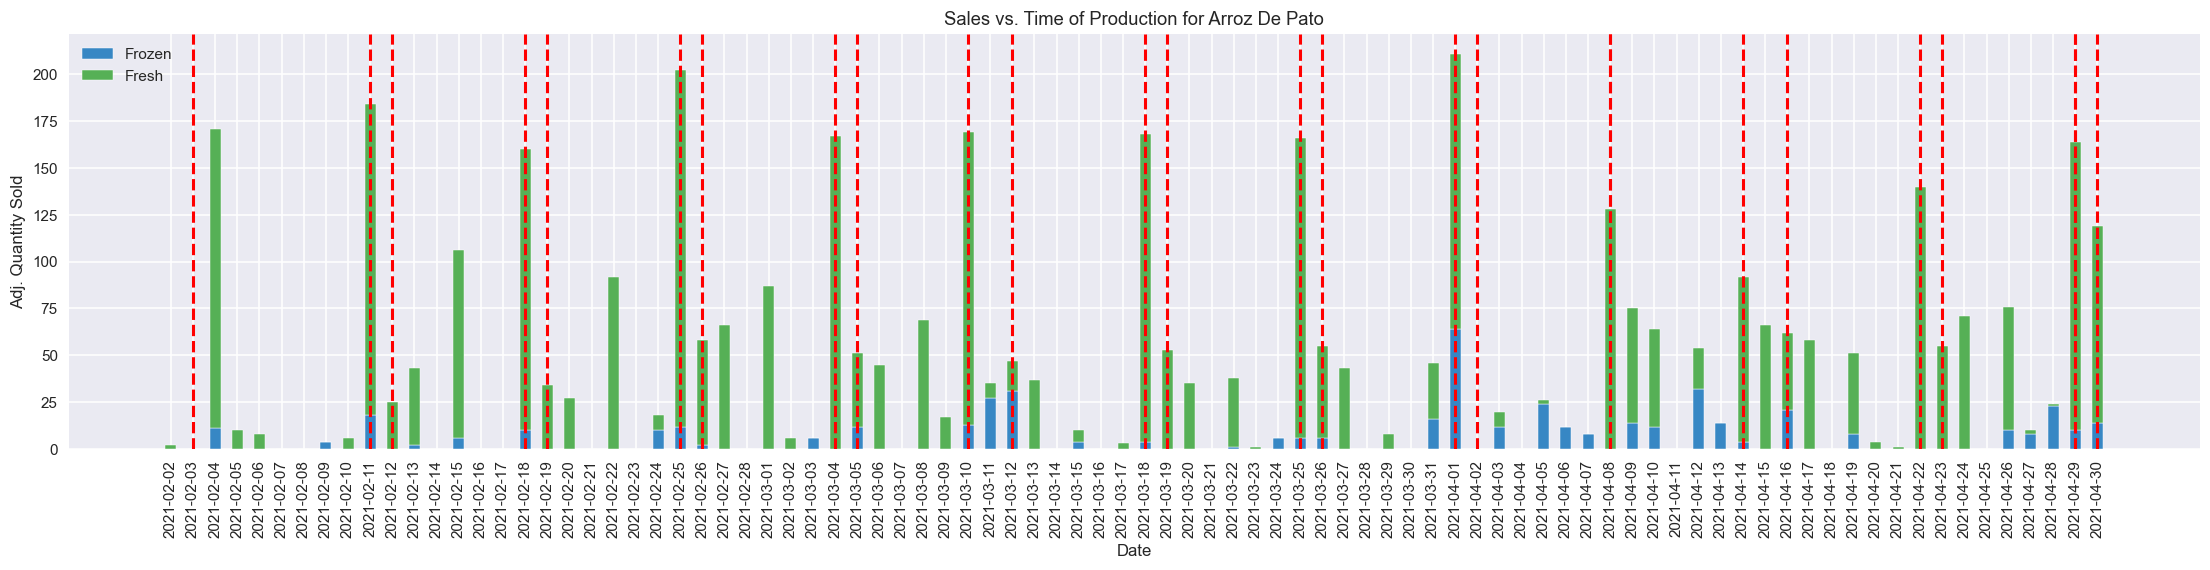

In [41]:
visualizer.plot_sales(article_names=[sample_dish], start_date=start_date, end_date=end_date)

**Production Tiles**

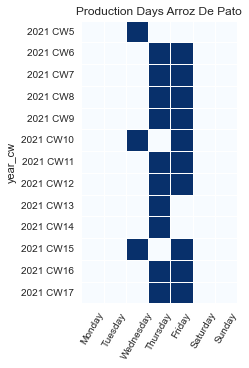

In [42]:
visualizer.plot_production_tiles(sample_dish, start_date, end_date, temp_type="Fresh")

**Single Response Curves**

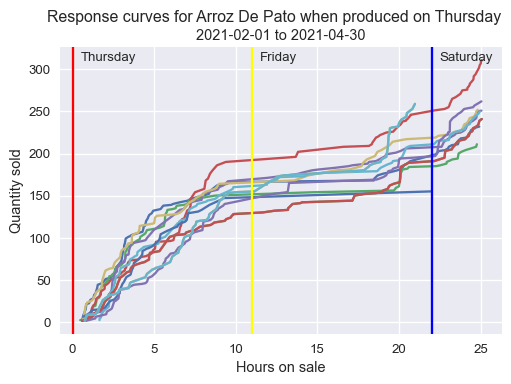

In [45]:
visualizer.plot_response_curves(sample_dish, 3, start_date, end_date, temp_type="Fresh")

**Aggregated Response Curves**

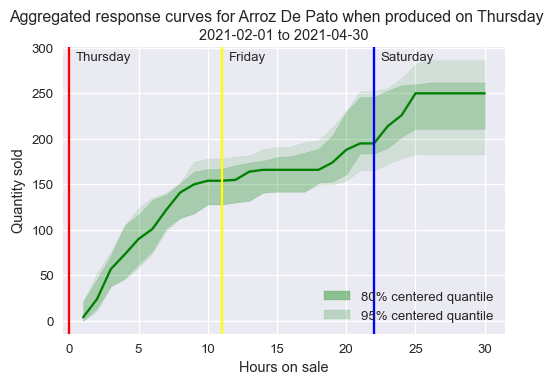

In [46]:
visualizer.plot_aggregated_response_curves(sample_dish, 3, start_date, end_date, temp_type="Fresh")

### 6.2 Evaluation of Model Performance

**Check performance over single train and test set**

RMSE: 112.64
MAE: 85.08
MAPE: 9.75


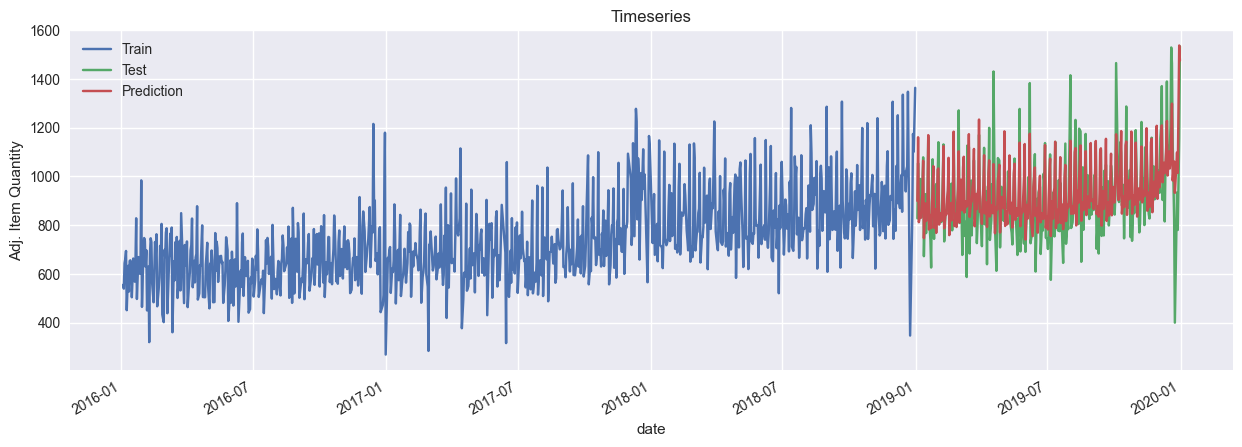

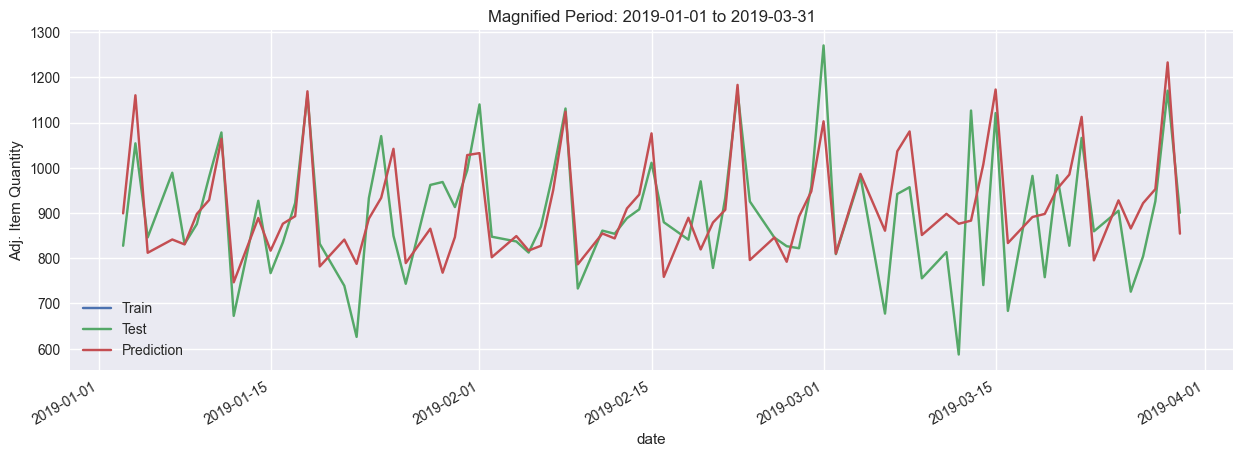

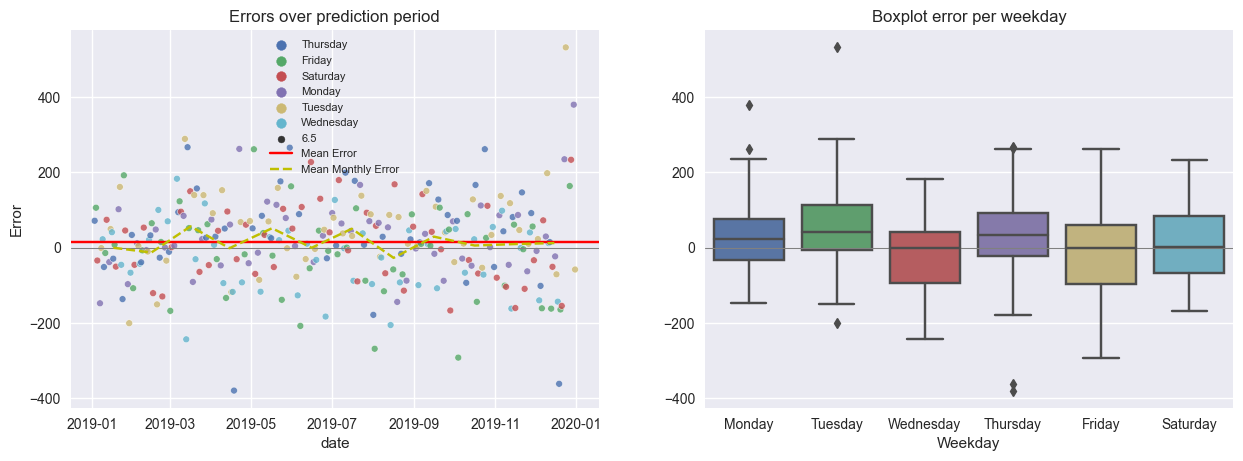

In [56]:
from src.visualization.plot_tools import VisualizerPrediction
train_mask = X.index.year < 2019
test_mask = X.index.year == 2019
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

model_fresh.fit(X_train, y_train)
pred = model_fresh.predict(X_test)
model_vis = VisualizerPrediction(y_train, y_test,
                                 pred=pd.Series(index=y_test.index, data=pred))
model_vis.evaluate_result(magnify_period=("2019-01-01", "2019-03-31"))

**Check performance over cross validation**

{'rmse': 233.03252980775517,
 'mae': 127.62963173909691,
 'mape': 0.17093548981676498}

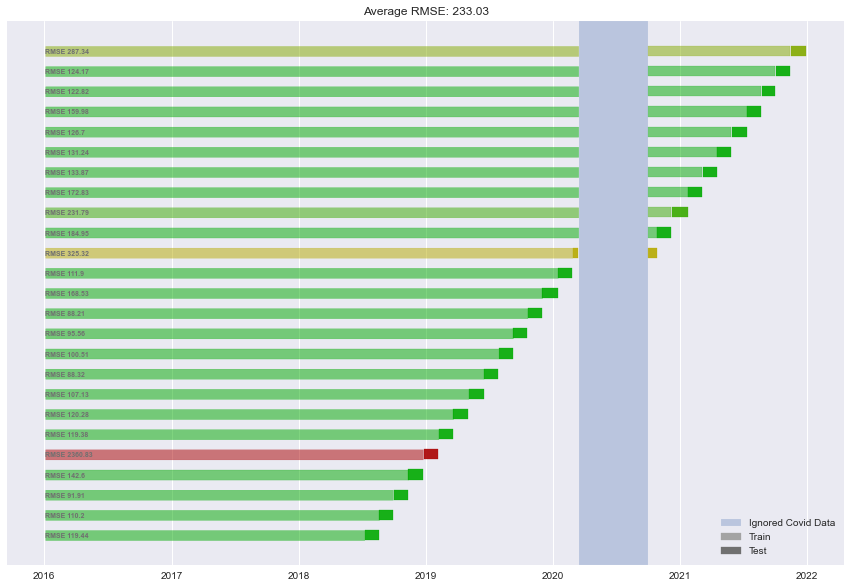

In [58]:
from src.models.agg_demand import cross_evaluate_model
cross_evaluate_model(model_fresh, X, y, show_plot=True, save_plot=False)

*Model performance is a lot worse because no feature exclusion has been performed*

## 7. Maintenance
For good continuous model performance, the model should be regularly maintained. Recommended measures are:
- Retrain the aggregate demand models [```retrain_best_model(temp_type)```]
- Recompute optimal hyperparameters for aggregate demand model [```compute_best_model(temp_type, save=True)```]
- Recompute DaySalesRatios matrix [```DaySalesRatios.compute(temp_type)```]
- Recompute AggregatedDishSalesRatios matrix [```AggregatedDishSalesRatios.compute(temp_type)```]
- Recompute DishSalesRatios matrix [```DishSalesRatios(temp_type).get_matrix(save=True)```]
- Recompute SizeShares matrix [```SizeShares.compute(temp_type)```]